# Wrange and Analyze Data Project

## I. Introduction
This project aims to practice data wrangling skills using real-world data from the tweet archive of @dog_rates (WeRateDogs). It involves gathering data from various sources, assessing it visually and programmatically for quality and tidiness issues, cleaning the data programmatically to address the identified issues, analyzing the cleaned dataset, and creating visualizations of the results.

## II. Gather Data

To gather the three pieces of data from different sources, we will:

- Obtain the WeRateDogs Twitter archive, which is provided as a CSV file called "twitter_archive_enhanced.csv."

- Download the tweet image predictions file, named "image_predictions.tsv," programmatically using the Requests library. The file can be accessed from the following URL: "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv."

- Programmatically download the tweet JSON data, named "tweet_json.txt," using the Requests library. The data can be retrieved from the following URL: "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt."






In [407]:
##################
#                #
# IMPORT MODULES #
#                #
##################

import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline

In [408]:
# Read Twitter CSV
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [409]:
# Read image_predictions.tsv via Requests library
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r =  requests.get(image_predictions_url)
r

<Response [200]>

In [410]:
# Save the file
if r.status_code == 200:

    with open('image-predictions.tsv', mode = 'wb') as file:
        file.write(r.content)
    
    # Read TSV file
    image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
    
else:
    print('Error: Cannot download image-predictions.tsv')

In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [412]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## III. Assess Data

### Twitter Archive 

In [413]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [414]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [415]:
twitter_archive.duplicated().sum()

0

In [416]:
twitter_archive.tweet_id.duplicated().sum()

0

In [417]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [418]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [419]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [420]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [421]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [422]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [423]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [424]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

#### Twitter Archive Observations

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be converted to string
- timestamp should be converted datetime (remove +0000 from end of strings)
- Combine doggo, floofer, pupper, puppo into one columns dog_stage.
- Source column should be be simplified. Results should be as such: IPhone, Web, Vine & TweetDeck.
- Only need the original ratings without any pictures, retweets, or replies. Additionally, remove any related columns. The picture aspect will be addressed at a later stage.
- Abnormal rating_denominator values exceeding 10

### Image Prediction

In [425]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [426]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [427]:
image_prediction.duplicated().sum()

0

In [428]:
image_prediction.tweet_id.duplicated().sum()

0

In [429]:
image_prediction.jpg_url.duplicated().sum()

66

In [430]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [431]:
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [432]:
image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

#### Image Prediction Observations

- Many of the predictions are absurd results like: banana, pot, assault_rifle, etc.
- There is 66 duplicated jpg_url results
- Only a single column with the most confident dog breed prediction

### Tweet Json

In [433]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [434]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [435]:
tweet_json.duplicated().sum()

0

In [436]:
tweet_json.tweet_id.duplicated().sum()

0

#### Image Prediction Observations
- The results in this table should be combined with the other two tables
- There seems to be a couple of missing 

## Tidiness and Quality

### Tidiness (2)

*All Tables*
- Data should be combined from all three tables and combined into 

*twitter archive*
- A new column should be created to store all the different stages of dogs in one column

### Quality (8)

*Twitter Archive*
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be converted to string
- Timestamp should be converted datetime (remove +0000 from end of strings)
- Source column should be be simplified. Results should be as such: IPhone, Web, Vine & TweetDeck.
- Only need the original ratings without any pictures, retweets, or replies. Additionally, remove any related columns. The picture aspect will be addressed at a later stage.
- Abnormal rating_denominator values exceeding 10

*Image Prediction* 

- Only a single column with the most confident dog breed prediction is needed

*Tweet Json*
- Many of the predictions are absurd results like: banana, pot, assault_rifle, etc.
- There is 66 duplicated jpg_url results


## IV. Clean Data

In [437]:
# Creat clean copies
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

## *Quality issues cleaning*

#### Define
Delete retweets and replies and only keepy original ratings

#### Code

In [438]:
# Find all rows with a null in_reply_to_status_id status
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

# Find all rows with a null retweeted_status_id status
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [439]:
twitter_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define 
drop columns that are related to retweets and replies. After dropping those columns, datatype issue with those columns will no longer be an issue

#### Code

In [440]:
# Remove 
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'],axis=1)

#### Test

In [441]:
twitter_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define 
Timestamp should be converted datetime (remove +0000 from end of strings)

#### Code

In [442]:
# Cut off the last 6 characters of 'records' records 
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].str[:-6]
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [443]:
twitter_archive_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Define 
Replace redundant source information with simpler categorical names

#### Code

In [444]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})

#### Test

In [445]:
twitter_archive_clean.source.value_counts()

iPhone       1964
Vine           91
Web            31
TweetDeck      11
Name: source, dtype: int64

#### Define  
Remove all entries that are not dogs

#### Code

In [446]:
drop_list = image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')['tweet_id']

# filter out all rows from image_prediction_clean with matching ids in the drop list array
image_prediction_clean = image_prediction_clean[~image_prediction_clean.tweet_id.isin(drop_list)]

# we will do the same for twitter_archive_clean & tweet_json_clean 
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(drop_list)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(drop_list)]


#### Test

In [447]:
# View reducded number of rows after cleaning out all posts with no dogs
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(1751, 12)
(1792, 12)
(2031, 3)


#### Define 
Abnormal rating_denominator that exceed the 10 

#### Code

In [448]:
# Ensure that all rating_denominator's are equal to 10
twitter_archive_clean['rating_denominator'] = 10

#### Test

In [449]:
twitter_archive_clean['rating_denominator'].value_counts()

10    1792
Name: rating_denominator, dtype: int64

#### Define  
Reduce image prediction columns to a single one with the most confident prediction

#### Code

In [450]:
# Add a breed_prediction column and a confident_level column
breed_prediction = []
confident_level = []

def breed_prediction_function(image_prediction_clean):
    if image_prediction_clean.p1_dog == True:
        breed_prediction.append(image_prediction_clean.p1)
        confident_level.append(image_prediction_clean.p1_conf)
    elif image_prediction_clean.p2_dog == True:
        breed_prediction.append(image_prediction_clean.p2)
        confident_level.append(image_prediction_clean.p2_conf)
    elif image_prediction_clean.p3_dog == True:
        breed_prediction.append(image_prediction_clean.p3)
        confident_level.append(image_prediction_clean.p3_conf)
    else:
        breed_prediction.append('breed_unknown')
        confident_level.append(0)
             
image_prediction_clean.apply(breed_prediction_function, axis=1)


image_prediction_clean['breed_prediction'] = breed_prediction
image_prediction_clean['confident_level'] = confident_level


image_prediction_clean = image_prediction_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

#### Test

In [451]:
image_prediction_clean.head()

,tweet_id,jpg_url,breed_prediction,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


#### Define 
Standarize capitalization of new breed column

#### Code

In [452]:
image_prediction_clean.breed_prediction = image_prediction_clean.breed_prediction.str.capitalize()

#### Test

In [453]:
image_prediction_clean.head()

,tweet_id,jpg_url,breed_prediction,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311


### Tidiness issues cleaning

#### Define
Combine all dog stages into one column

#### Code

In [454]:
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_stage')

# Drop type column  
twitter_archive_clean.drop('type', 1, inplace = True)

# Sort by dog_stage and drop duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

/var/folders/6d/mssv62bs4cxfypz3gm0dkgpc0000gn/T/ipykernel_40846/670077571.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean.drop('type', 1, inplace = True)


#### Test

In [455]:
twitter_archive_clean.dog_stage.value_counts()

None       1502
pupper      194
doggo        63
puppo        23
floofer      10
Name: dog_stage, dtype: int64

#### Define 
Combine Tweet Json table with Twitter Archive table

#### Code

In [456]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on = ['tweet_id'], how = 'left')

In [457]:
image_prediction_clean.head()

,tweet_id,jpg_url,breed_prediction,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311


In [458]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 1 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2031 non-null   int64
 1   retweet_count   2031 non-null   int64
 2   favorite_count  2031 non-null   int64
dtypes: int64(3)
memory usage: 63.5 KB


#### Define 
We will combine the image prediction table with the twitter archive table

#### Code

In [459]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                            on = ['tweet_id'], how = 'left')

In [460]:
twitter_archive_clean = (twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()])

In [461]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1791
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1666 non-null   int64         
 1   timestamp           1666 non-null   datetime64[ns]
 2   source              1666 non-null   object        
 3   text                1666 non-null   object        
 4   expanded_urls       1666 non-null   object        
 5   rating_numerator    1666 non-null   int64         
 6   rating_denominator  1666 non-null   int64         
 7   name                1666 non-null   object        
 8   dog_stage           1666 non-null   object        
 9   retweet_count       1666 non-null   int64         
 10  favorite_count      1666 non-null   int64         
 11  jpg_url             1666 non-null   object        
 12  breed_prediction    1666 non-null   object        
 13  confident_level     1666 non-null   float64     

#### Test

In [462]:
# number of null values after cleaning
twitter_archive_clean.jpg_url.isnull().sum()

0

### Viewing and Storing our clenaed data

#### Code

In [463]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed_prediction,confident_level
0,667455448082227200,2015-11-19 21:32:34,Web,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,66,203,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
1,667470559035432960,2015-11-19 22:32:36,Web,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
2,667491009379606528,2015-11-19 23:53:52,Web,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
3,667495797102141441,2015-11-20 00:12:54,Web,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
4,667502640335572993,2015-11-20 00:40:05,Web,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709


In [464]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_clean.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_clean.csv')

#### Test

In [468]:
df.columns

Index(['Unnamed: 0', 'tweet_id', 'timestamp', 'source', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'retweet_count', 'favorite_count', 'jpg_url',
       'breed_prediction', 'confident_level'],
      dtype='object')

In [466]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed_prediction,confident_level
0,0,667455448082227200,2015-11-19 21:32:34,Web,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,66,203,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
1,1,667470559035432960,2015-11-19 22:32:36,Web,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
2,2,667491009379606528,2015-11-19 23:53:52,Web,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
3,3,667495797102141441,2015-11-20 00:12:54,Web,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
4,4,667502640335572993,2015-11-20 00:40:05,Web,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709


## V. Analyzing Data & Visualization

### 1. Most Popular Breed of Dogs

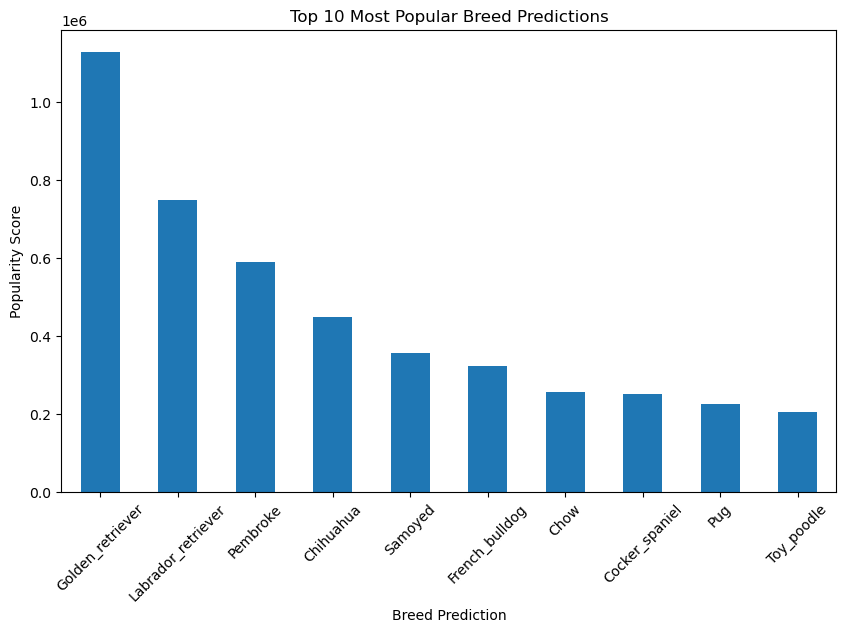

In [478]:
relevant_columns = ['breed_prediction', 'retweet_count', 'favorite_count']

# Create a copy of the filtered data
filtered_data = df[relevant_columns].copy()

# Calculate popularity score as the sum of retweet_count and favorite_count
filtered_data['popularity_score'] = (0.6 * filtered_data['retweet_count']) + (0.4 * filtered_data['favorite_count'])

# Group the data by breed_prediction and calculate the total popularity score
grouped_data = filtered_data.groupby('breed_prediction')['popularity_score'].sum()

# Sort the data in descending order and select the top 10 breeds
sorted_data = grouped_data.sort_values(ascending=False).head(10)

# Create a bar graph to visualize the popularity of breed_prediction
plt.figure(figsize=(10, 6))
sorted_data.plot(kind='bar')
plt.xlabel('Breed Prediction')
plt.ylabel('Popularity Score')
plt.title('Top 10 Most Popular Breed Predictions')
plt.xticks(rotation=45)
plt.show()

### 2. Ratio of Dog Stages (Excluding "none" Field)

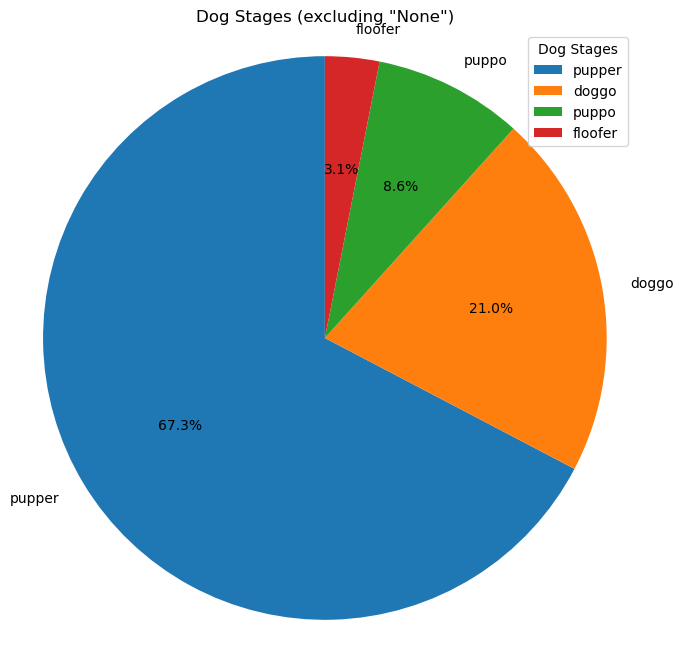

In [483]:
# Filter out rows with 'None' in the dog_stage column
filtered_data = df[df['dog_stage'] != 'None']

# Count the occurrences of each dog stage
dog_stage_counts = filtered_data['dog_stage'].value_counts()

# Calculate the percentages of each dog stage
dog_stage_percentages = (dog_stage_counts / dog_stage_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dog_stage_percentages, labels=dog_stage_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Dog Stages (excluding "None")')
plt.axis('equal')

# Add a legend
plt.legend(title='Dog Stages', loc='best')

# Show the pie chart
plt.show()

### 3. Popularity of Dog Stages based on Retweet Count

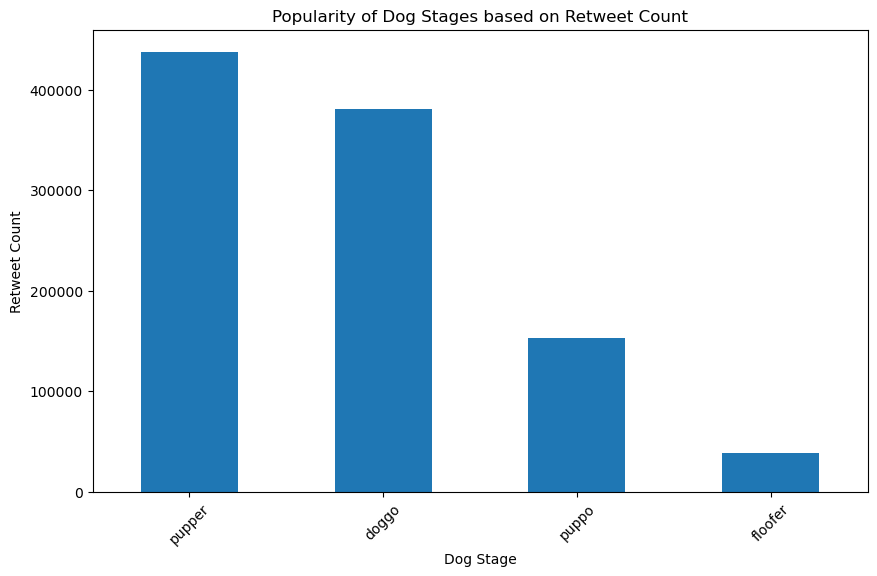

In [500]:
# Filter out rows with 'None' in the dog_stage column
filtered_data = df[df['dog_stage'] != 'None']

# Group the data by dog_stage and calculate the total retweet count for each stage
grouped_data = filtered_data.groupby('dog_stage')['retweet_count'].sum()

# Sort the data in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Create a bar graph to visualize the popularity of different dog stages based on retweet count
plt.figure(figsize=(10, 6))
sorted_data.plot(kind='bar')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count')
plt.title('Popularity of Dog Stages based on Retweet Count')
plt.xticks(rotation=45)
plt.show()

In [501]:
sorted_data

dog_stage
pupper     437735
doggo      381233
puppo      153087
floofer     38214
Name: retweet_count, dtype: int64

### 4. Frequency of Different Sources Used

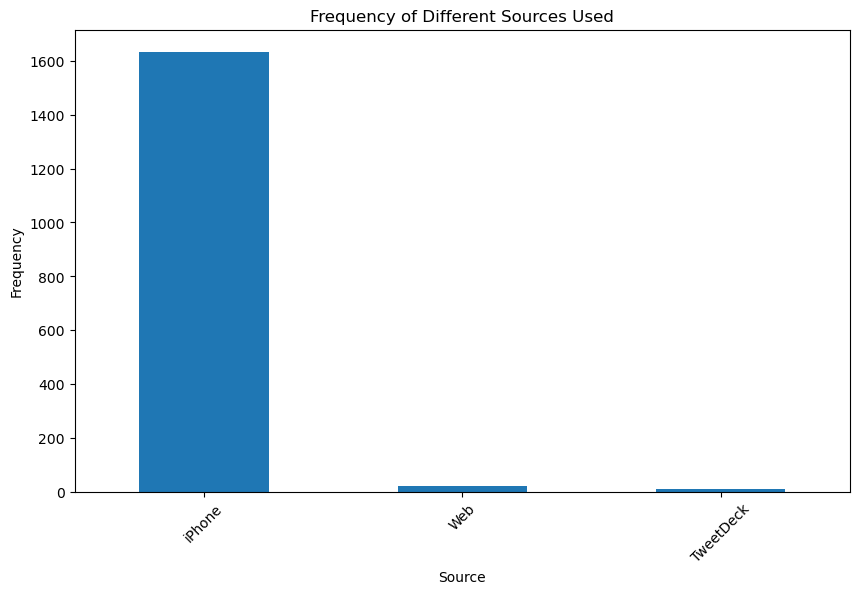

In [485]:
# Count the occurrences of each source
source_counts = df['source'].value_counts()

# Create a bar graph to visualize the frequency of different sources used
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.title('Frequency of Different Sources Used')
plt.xticks(rotation=45)
plt.show()

In [486]:
df['source'].value_counts()

iPhone       1635
Web            22
TweetDeck       9
Name: source, dtype: int64